# Importing Labraries

In [35]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures


# Week 1: Data Exploration and Preprocessing

### Task 1: Import and Understand Data
➢ Load the dataset.
➢ Display the first few rows to understand its structure.
➢ Check data types, missing values, and basic statistics

In [36]:
# Loading the dataset
data = pd.read_csv('Stock Market Dataset.csv')
print(data)

      Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0              0  02-02-2024              2.079               NaN   
1              1  01-02-2024              2.050          161340.0   
2              2  31-01-2024              2.100          142860.0   
3              3  30-01-2024              2.077          139750.0   
4              4  29-01-2024              2.490            3590.0   
...          ...         ...                ...               ...   
1238        1238  08-02-2019              2.583          147880.0   
1239        1239  07-02-2019              2.551          211790.0   
1240        1240  06-02-2019              2.662           98330.0   
1241        1241  05-02-2019              2.662           82250.0   
1242        1242  04-02-2019              2.660          116490.0   

      Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  \
0               72.28             NaN        3.8215          NaN   
1               73.82        577940

In [37]:
# Printing column names to check available features
print(data.columns)

Index(['Unnamed: 0', 'Date', 'Natural_Gas_Price', 'Natural_Gas_Vol.',
       'Crude_oil_Price', 'Crude_oil_Vol.', 'Copper_Price', 'Copper_Vol.',
       'Bitcoin_Price', 'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.',
       'Ethereum_Price', 'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price',
       'Nasdaq_100_Vol.', 'Apple_Price', 'Apple_Vol.', 'Tesla_Price',
       'Tesla_Vol.', 'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price',
       'Silver_Vol.', 'Google_Price', 'Google_Vol.', 'Nvidia_Price',
       'Nvidia_Vol.', 'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price',
       'Netflix_Vol.', 'Amazon_Price', 'Amazon_Vol.', 'Meta_Price',
       'Meta_Vol.', 'Gold_Price', 'Gold_Vol.'],
      dtype='object')


In [38]:
# Displaying the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   Unnamed: 0        Date  Natural_Gas_Price  Natural_Gas_Vol.  \
0           0  02-02-2024              2.079               NaN   
1           1  01-02-2024              2.050          161340.0   
2           2  31-01-2024              2.100          142860.0   
3           3  30-01-2024              2.077          139750.0   
4           4  29-01-2024              2.490            3590.0   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol. Bitcoin_Price  \
0            72.28             NaN        3.8215          NaN     43,194.70   
1            73.82        577940.0        3.8535          NaN     43,081.40   
2            75.85        344490.0        3.9060          NaN     42,580.50   
3            77.82        347240.0        3.9110          NaN     42,946.20   
4            76.78        331930.0        3.8790          NaN     43,299.80   

   Bitcoin_Vol.  ... Berkshire_Price  Berkshire_Vol. Netflix_Price  \
0       42650.0  ...       

In [39]:
# Checking data types and missing values
print("\nData types and missing values:")
print(data.info())



Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1243 non-null   int64  
 1   Date               1243 non-null   object 
 2   Natural_Gas_Price  1243 non-null   float64
 3   Natural_Gas_Vol.   1239 non-null   float64
 4   Crude_oil_Price    1243 non-null   float64
 5   Crude_oil_Vol.     1220 non-null   float64
 6   Copper_Price       1243 non-null   float64
 7   Copper_Vol.        1206 non-null   float64
 8   Bitcoin_Price      1243 non-null   object 
 9   Bitcoin_Vol.       1243 non-null   float64
 10  Platinum_Price     1243 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1243 non-null   object 
 13  Ethereum_Vol.      1243 non-null   float64
 14  S&P_500_Price      1243 non-null   object 
 15  Nasdaq_100_Price   1243 non-null   objec

In [40]:
# Displaying basic statistics
print("\nBasic statistics of the dataset:")
print(data.describe())



Basic statistics of the dataset:
        Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  Crude_oil_Price  \
count  1243.000000        1243.000000       1239.000000      1243.000000   
mean    621.000000           3.494714     131624.116223        67.577064   
std     358.967501           1.822540      64385.141749        20.465500   
min       0.000000           1.482000       1200.000000       -37.630000   
25%     310.500000           2.347500      91900.000000        55.095000   
50%     621.000000           2.702000     127370.000000        69.230000   
75%     931.500000           4.055500     169460.000000        80.455000   
max    1242.000000           9.647000     381970.000000       123.700000   

       Crude_oil_Vol.  Copper_Price    Copper_Vol.  Bitcoin_Vol.  \
count    1.220000e+03   1243.000000    1206.000000  1.243000e+03   
mean     3.989038e+05      3.541957   35406.616915  4.033918e+07   
std      2.161619e+05      0.702819   38415.448731  2.940889e+08   
min      

### Task 2: Exploratory Data Analysis (EDA)
➢ Visualize the distribution of the target variable (Amazon_Price).
➢ Analyze relationships between Amazon_Price and other features using
scatter plots.
➢ Compute and visualize the correlation matrix.


In [41]:
# Setting the style of seaborn for better visuals
sns.set(style='whitegrid')

In [42]:
# List of features to analyze
features = [
    'Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price',
    'Ethereum_Price', 'S&P_500_Price', 'Apple_Price', 'Tesla_Price',
    'Microsoft_Price', 'Silver_Price', 'Google_Price', 'Nvidia_Price',
    'Berkshire_Price', 'Netflix_Price', 'Meta_Price', 'Gold_Price'
]


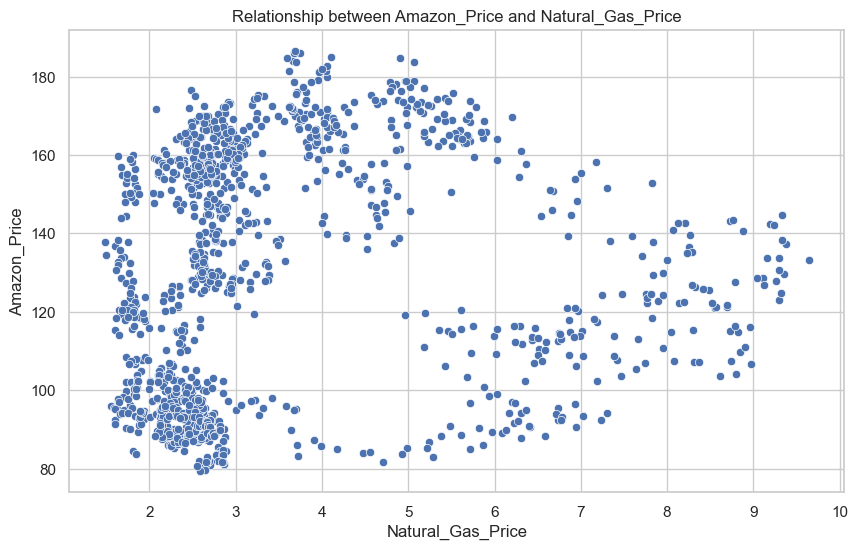

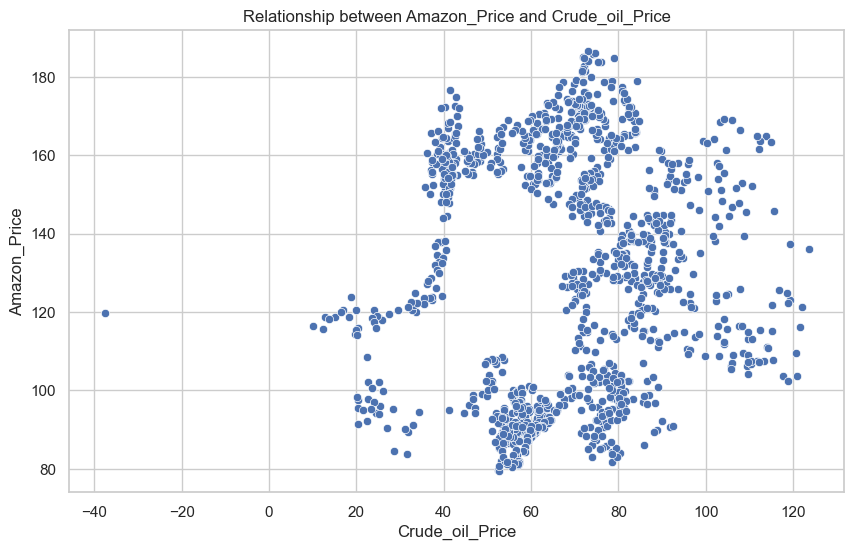

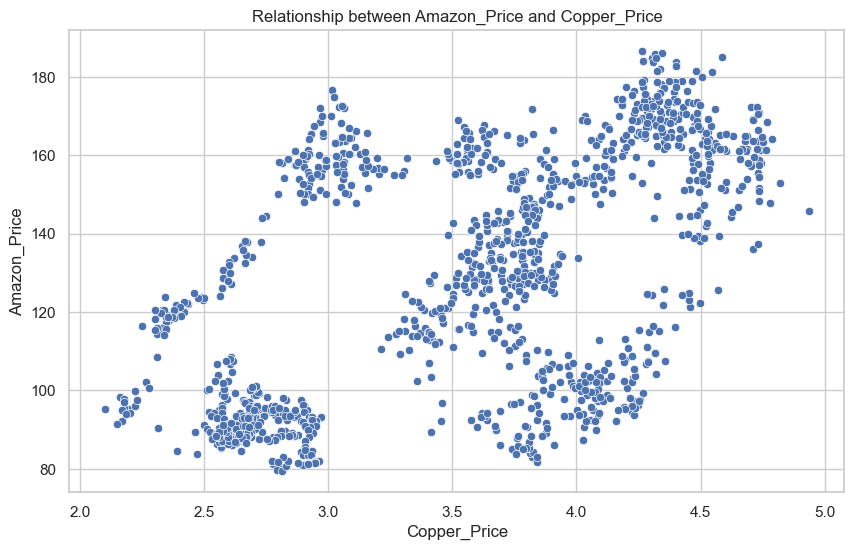

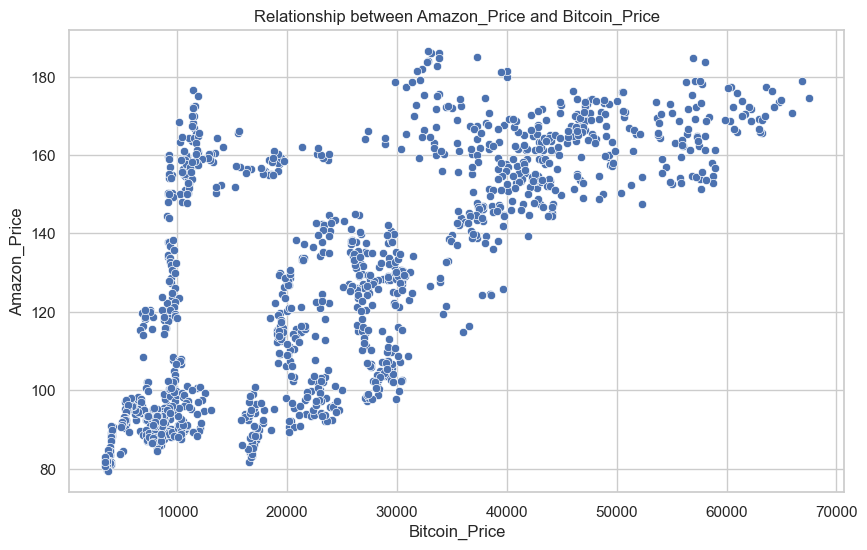

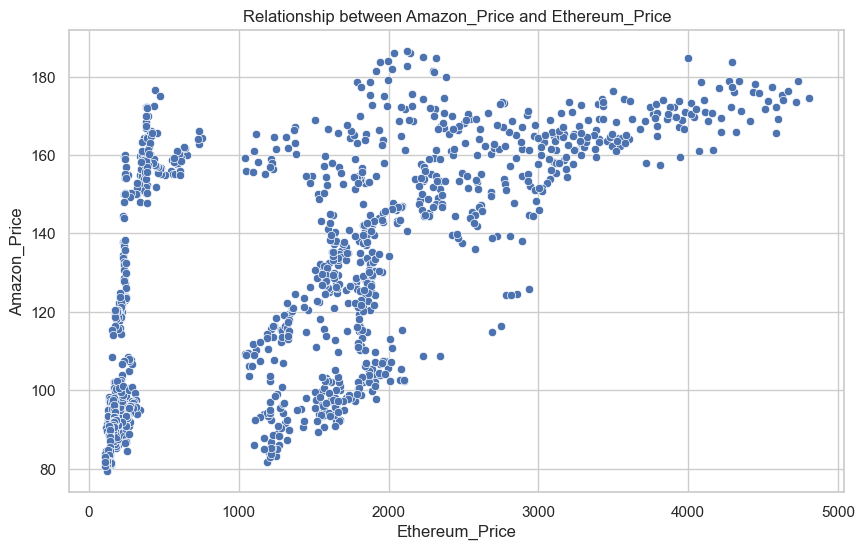

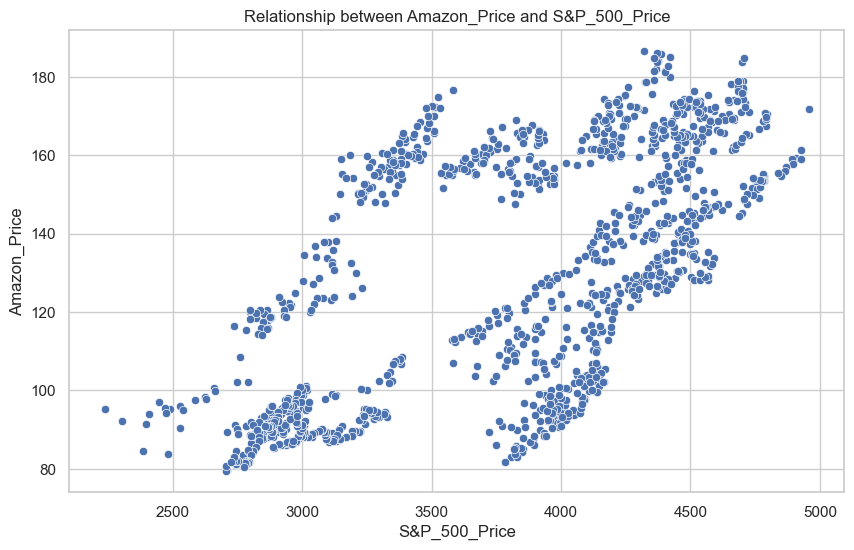

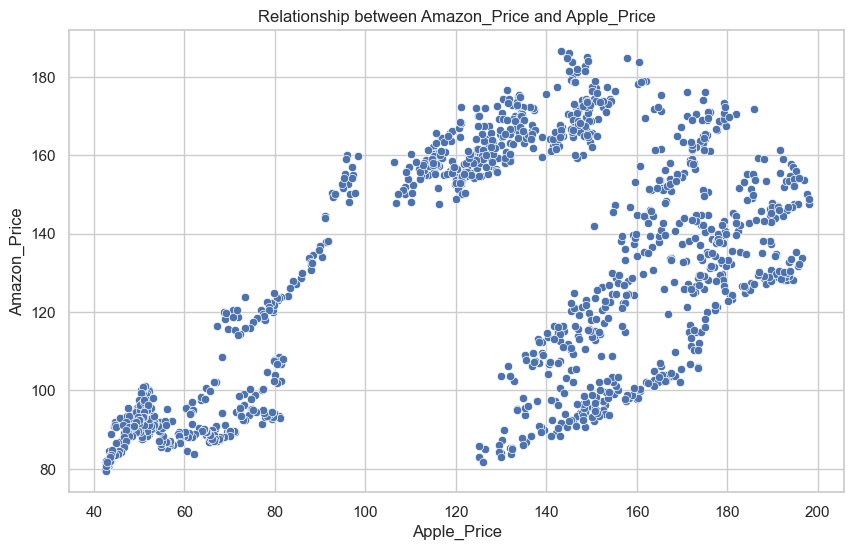

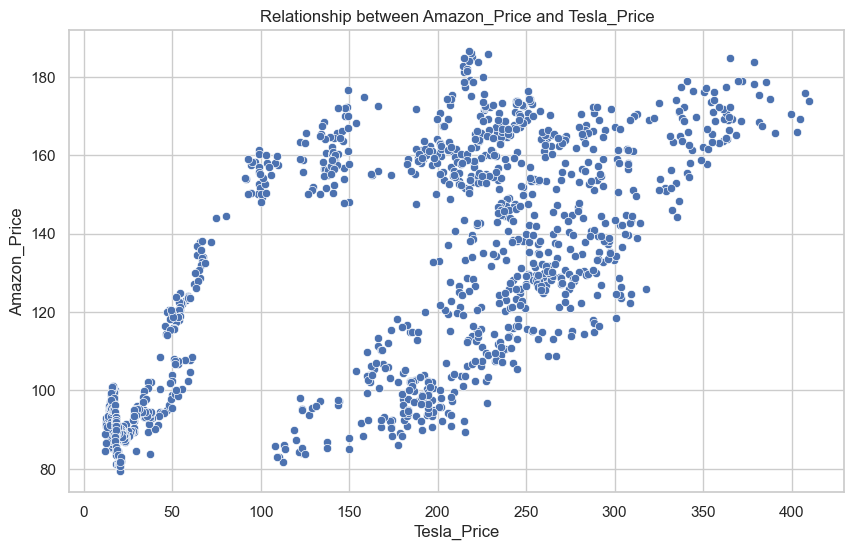

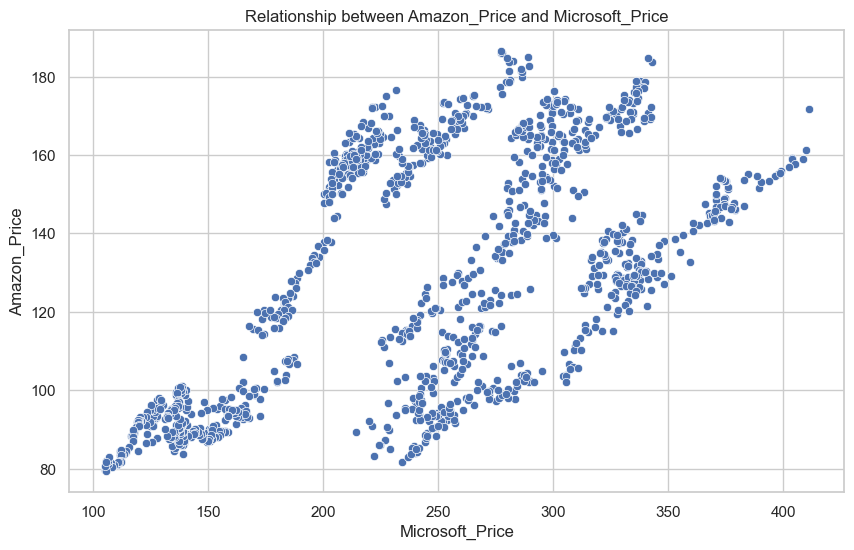

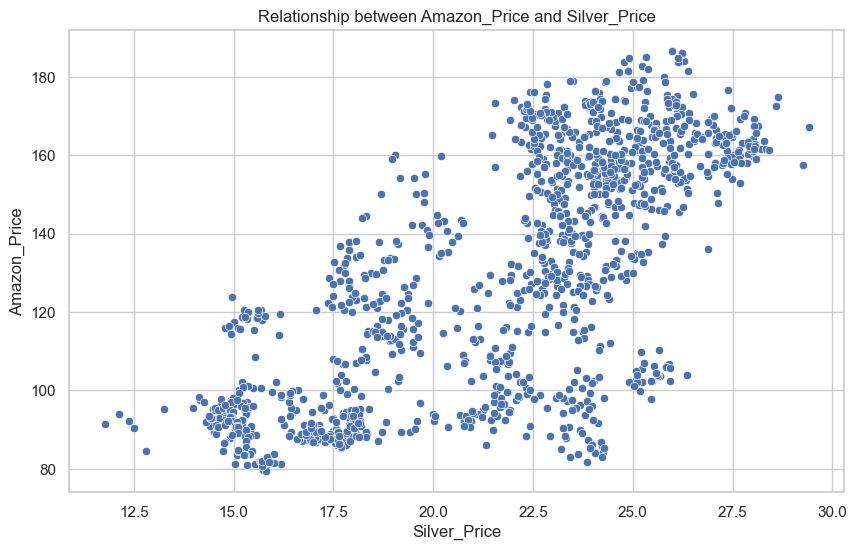

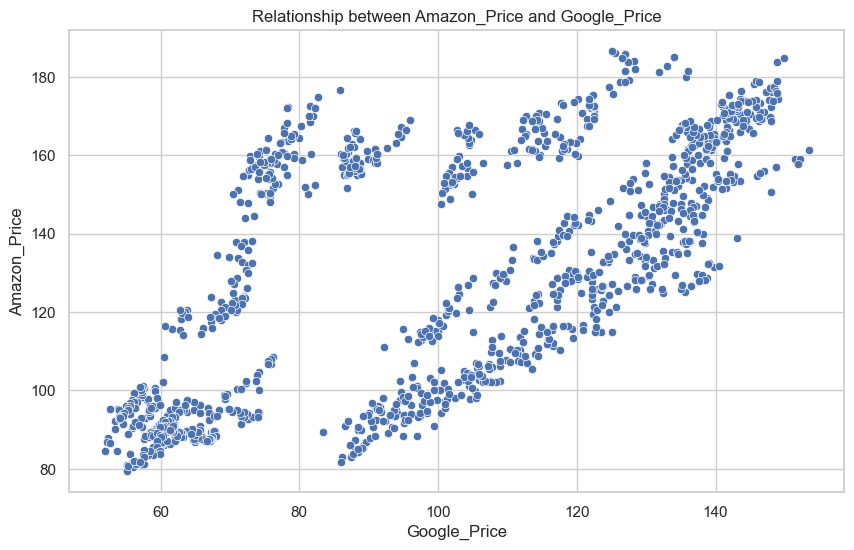

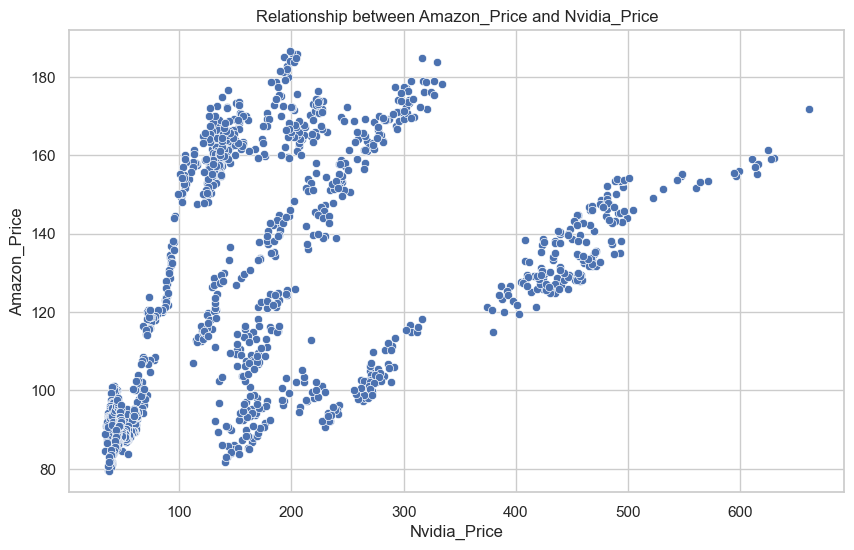

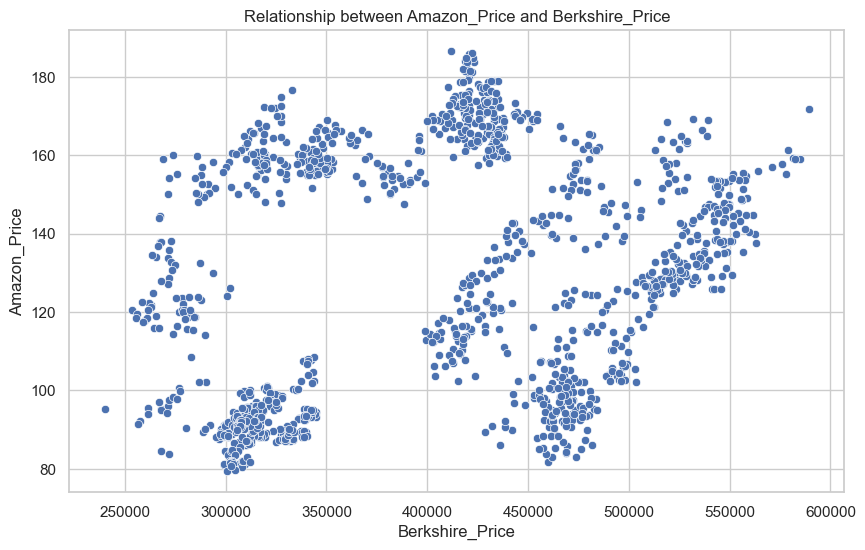

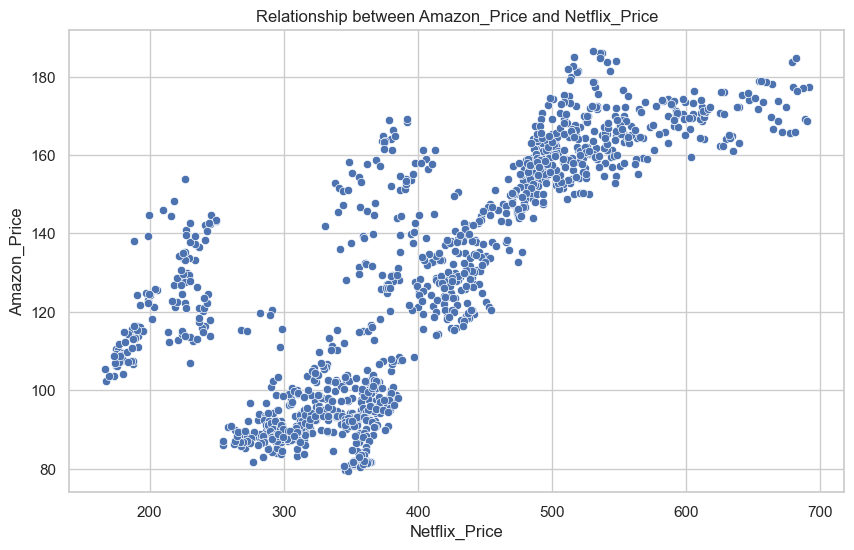

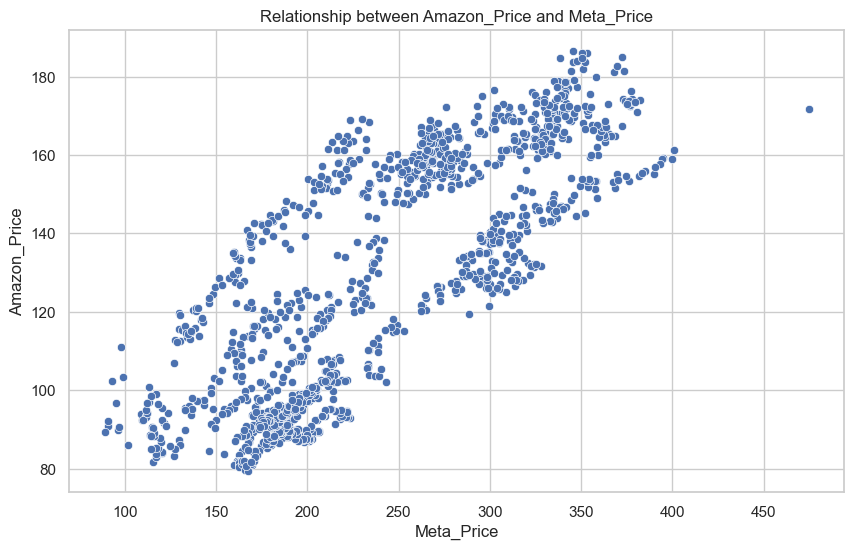

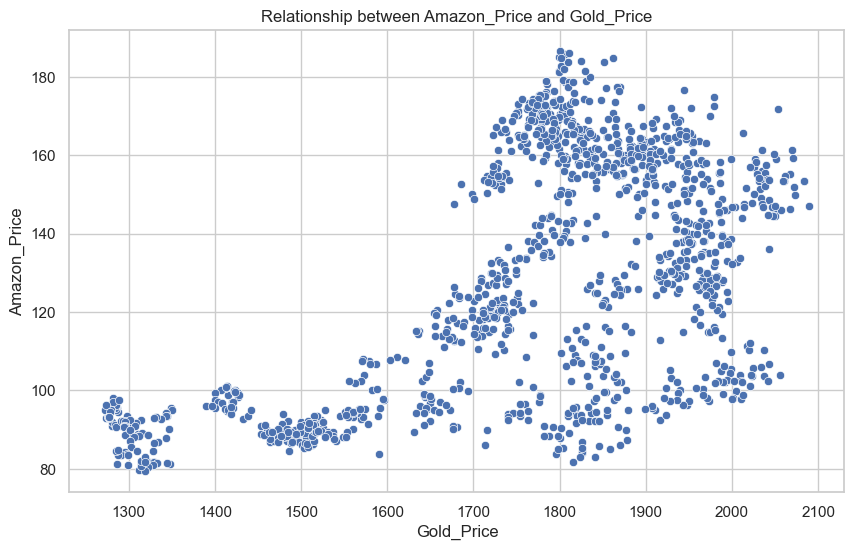

In [43]:
# Analyzing relationships between Amazon_Price and other features using scatter plots
for feature in features:
    if feature in data.columns:  # Checking if the feature exists in the DataFrame
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['Amazon_Price'])
        plt.title(f'Relationship between Amazon_Price and {feature}')
        plt.xlabel(feature)
        plt.ylabel('Amazon_Price')
        plt.show()
    else:
        print(f"Feature '{feature}' not found in the dataset.")

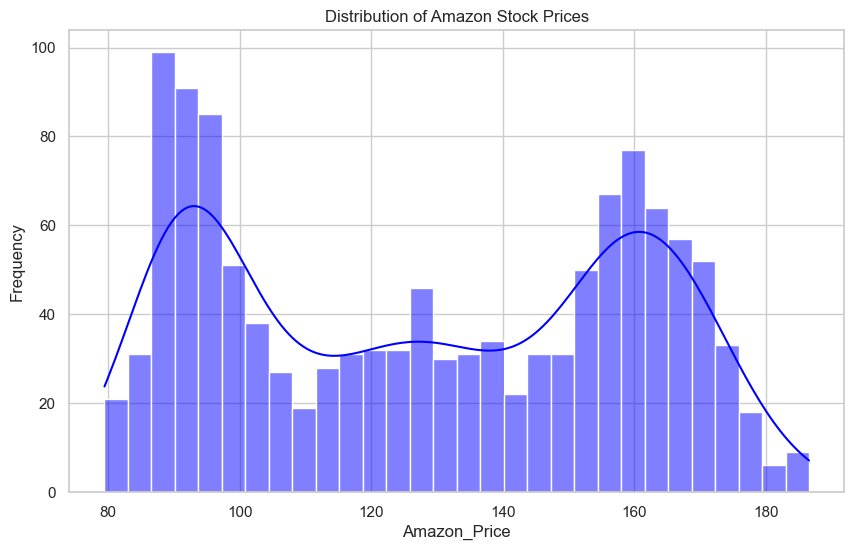

In [44]:

# Visualizing the distribution of the target variable (Amazon_Price)
plt.figure(figsize=(10, 6))
sns.histplot(df['Amazon_Price'], bins=30, kde=True, color='blue')
plt.title('Distribution of Amazon Stock Prices')
plt.xlabel('Amazon_Price')
plt.ylabel('Frequency')
plt.show()


                   Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  \
Unnamed: 0           1.000000          -0.365264          0.187563   
Natural_Gas_Price   -0.365264           1.000000         -0.208991   
Natural_Gas_Vol.     0.187563          -0.208991          1.000000   
Crude_oil_Price     -0.639833           0.716886         -0.237081   
Crude_oil_Vol.       0.474382          -0.247646          0.155983   

                   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  \
Unnamed: 0               -0.639833        0.474382     -0.657196    -0.220568   
Natural_Gas_Price         0.716886       -0.247646      0.464759    -0.281545   
Natural_Gas_Vol.         -0.237081        0.155983     -0.228252    -0.022949   
Crude_oil_Price           1.000000       -0.285883      0.708823    -0.011311   
Crude_oil_Vol.           -0.285883        1.000000     -0.376705     0.035555   

                   Bitcoin_Vol.  Platinum_Vol.  Ethereum_Vol.  ...  \
Unnamed: 0            

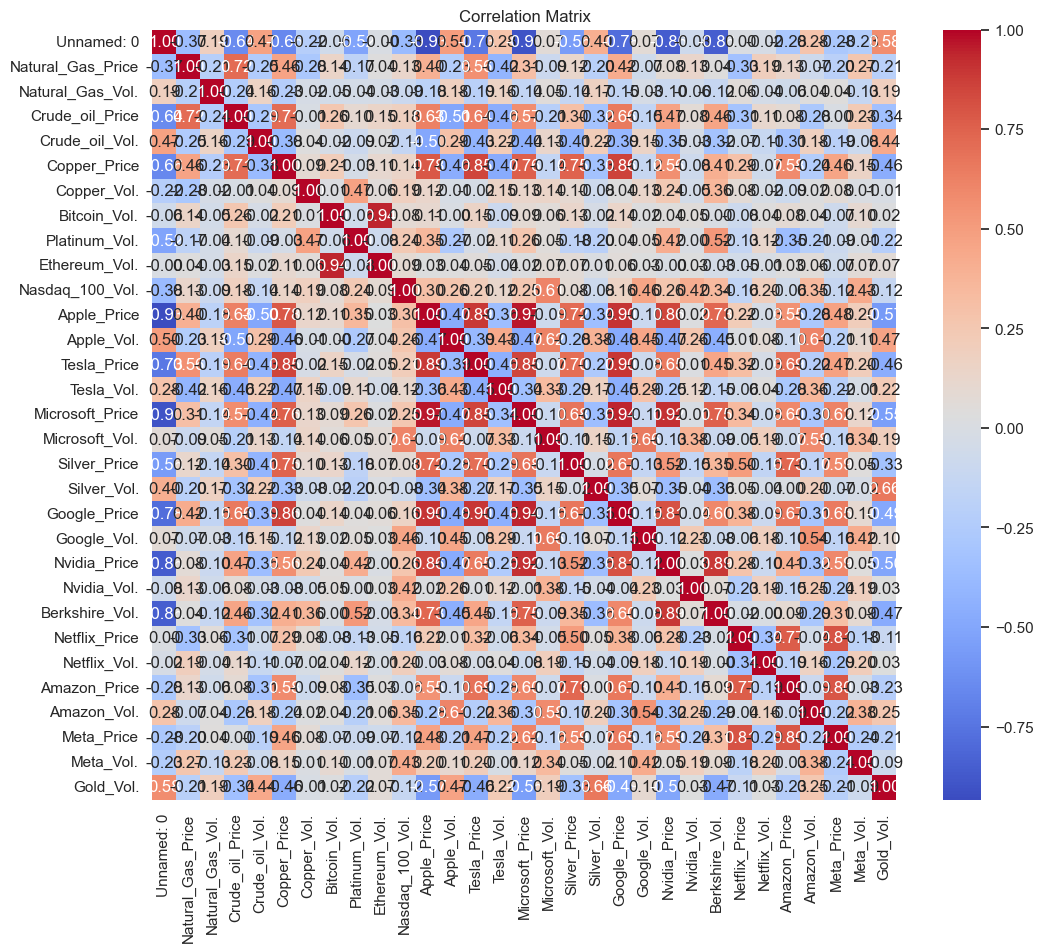

In [45]:
# Dropping non-numeric columns for correlation computation
numeric_df = data.select_dtypes(include=['number'])

# Computing the correlation matrix
correlation_matrix = numeric_df.corr()

# Checking the correlation matrix
print(correlation_matrix.head())

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### Task 3: Feature Engineering
➢ Handle missing values by filling them with the mean of the respective
columns.
➢ Standardize the features using StandardScaler

In [46]:
# Cleaning numeric columns by removing commas or other non-numeric characters
data['Bitcoin_Price'] = data['Bitcoin_Price'].replace('[\$,]', '', regex=True).astype(float)
data['Platinum_Price'] = data['Platinum_Price'].replace('[\$,]', '', regex=True).astype(float)
data['Ethereum_Price'] = data['Ethereum_Price'].replace('[\$,]', '', regex=True).astype(float)
data['S&P_500_Price'] = data['S&P_500_Price'].replace('[\$,]', '', regex=True).astype(float)
data['Nasdaq_100_Price'] = data['Nasdaq_100_Price'].replace('[\$,]', '', regex=True).astype(float)
data['Berkshire_Price'] = data['Berkshire_Price'].replace('[\$,]', '', regex=True).astype(float)
data['Gold_Price'] = data['Gold_Price'].replace('[\$,]', '', regex=True).astype(float)
# Repeating cleaning for any other relevant columns

# Converting the 'Date' column to a datetime type (if needed for analysis)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

# Filtering out only numeric columns for filling missing values
numeric_data = data.select_dtypes(include=['number'])

# Handling missing values by filling with the mean of respective columns
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Standardizing the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_data)

# Creating a DataFrame with standardized features
scaled_data = pd.DataFrame(scaled_features, columns=numeric_data.columns)

# Re-adding non-numeric columns (e.g., 'Date') to the final DataFrame
non_numeric_data = data.select_dtypes(exclude=['number'])
final_data = pd.concat([non_numeric_data.reset_index(drop=True), scaled_data.reset_index(drop=True)], axis=1)

print("Standardized data preview:")
print(final_data.head())


Standardized data preview:
        Date  Unnamed: 0  Natural_Gas_Price  Natural_Gas_Vol.  \
0 2024-02-02   -1.730658          -0.777093          0.000000   
1 2024-02-01   -1.727871          -0.793012          0.462464   
2 2024-01-31   -1.725084          -0.765566          0.174863   
3 2024-01-30   -1.722297          -0.778191          0.126462   
4 2024-01-29   -1.719510          -0.551493         -1.992578   

   Crude_oil_Price  Crude_oil_Vol.  Copper_Price  Copper_Vol.  Bitcoin_Price  \
0         0.229891    2.719160e-16      0.397906          0.0       1.120470   
1         0.305170    8.363643e-01      0.443456          0.0       1.113399   
2         0.404401   -2.541929e-01      0.518185          0.0       1.082136   
3         0.500699   -2.413464e-01      0.525302          0.0       1.104961   
4         0.449861   -3.128667e-01      0.479753          0.0       1.127029   

   Bitcoin_Vol.  ...  Berkshire_Price  Berkshire_Vol.  Netflix_Price  \
0     -0.137077  ...         

# Week 2: Model Development

### Task 1: Split the Data
➢ Define the features (X) and the target variable (y).
➢ Split the data into training and testing sets using an 80-20 split.

In [47]:
# Defining the features (X) and the target variable (y)
X = final_data.drop(columns=['Amazon_Price', 'Date', 'Unnamed: 0'])  # Drop non-feature columns if necessary
y = final_data['Amazon_Price']

In [48]:
# Splitting the data into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [49]:
# Displaying the shapes of the training and testing sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (994, 36)
Training Target Shape: (994,)
Testing Features Shape: (249, 36)
Testing Target Shape: (249,)


### Task 2: Train the Model
➢ Initialize a Linear Regression model.
➢ Train the model on the training data.
➢ Predict on the testing data.
➢ Evaluate the model using Mean Absolute Error (MAE), Mean Squared Error
   (MSE), and Root Mean Squared Error (RMSE)

In [50]:
# Initializing the Linear Regression model
model = LinearRegression()


In [51]:
# Training the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [52]:
# Predicting on the testing data
y_pred = model.predict(X_test)

In [53]:
# Evaluating the model
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Printing the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.16572023716184434
Mean Squared Error (MSE): 0.04498160498141285
Root Mean Squared Error (RMSE): 0.2120886724495508


# Week 3: Model Validation and Testing

### Task 1: Cross-Validation
➢ Perform 5-fold cross-validation to assess the model's performance.
➢ Calculate the mean and standard deviation of the cross-validation scores.

In [54]:
# Performing 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')


In [55]:
# Converting negative MSE scores to positive MSE
cv_scores = -cv_scores

In [56]:
# Calculating mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Mean Cross-Validation Score (MSE): {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Scores (MSE): {std_cv_score}")

Mean Cross-Validation Score (MSE): 0.8748350264149618
Standard Deviation of Cross-Validation Scores (MSE): 0.6992827144818202


The results of your 5-fold cross-validation indicate the following:

Mean Cross-Validation Score (MSE): 0.8748: This value represents the average Mean Squared Error across the 5 folds. It's relatively high, indicating that, on average, the model is not performing very well in terms of minimizing the error.

Standard Deviation of Cross-Validation Scores (MSE): 0.6993: This shows the variability of the MSE across different folds. A high standard deviation suggests that the model's performance is inconsistent and varies significantly depending on the fold.

Hence, the solution on this query is as follows:-

### 1. Feature Engineering
a. Feature Scaling/Normalization


In [57]:
# Initializing the scaler
scaler = StandardScaler()

# Fitting and transforming the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the testing data
X_test_scaled = scaler.transform(X_test)

b. Feature Selection

In [58]:
# Initializing RFE
rfe = RFE(model, n_features_to_select=20) # Choose the number of features to select
rfe = rfe.fit(X_train_scaled, y_train)

# Getting selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)

Selected Features: Index(['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Bitcoin_Price',
       'Bitcoin_Vol.', 'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price',
       'Ethereum_Vol.', 'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
       'Apple_Price', 'Microsoft_Price', 'Silver_Price', 'Google_Price',
       'Nvidia_Price', 'Nvidia_Vol.', 'Berkshire_Price', 'Meta_Vol.'],
      dtype='object')


In [59]:
# Initializing PolynomialFeatures
poly = PolynomialFeatures(degree=2) 

# Transforming the features
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [60]:
# Evaluating the model using cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()
std_cv_score = cv_scores.std()

print("Mean Cross-Validation Score (MSE):", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores (MSE):", std_cv_score)

Mean Cross-Validation Score (MSE): 0.045887493790202113
Standard Deviation of Cross-Validation Scores (MSE): 0.00575663230719246


### Task 2: Test Model on Unseen Data
➢ Use a portion of the testing data as recent data for validation.
➢ Predict on recent data and evaluate the model using MAE and RMSE. 

In [61]:
# Selecting a portion of the testing data as recent data for validation
recent_data_size = int(0.2 * len(X_test))  # For example, using 20% of the test data
recent_X_test = X_test[-recent_data_size:]
recent_y_test = y_test[-recent_data_size:]


In [62]:
# Predicting on the recent data
recent_predictions = model.predict(recent_X_test)

In [63]:
# Evaluating the model
recent_mae = mean_absolute_error(recent_y_test, recent_predictions)
recent_rmse = np.sqrt(mean_squared_error(recent_y_test, recent_predictions))

# Printing the evaluation metrics
print(f"Recent Data Mean Absolute Error (MAE): {recent_mae}")
print(f"Recent Data Root Mean Squared Error (RMSE): {recent_rmse}")

Recent Data Mean Absolute Error (MAE): 0.14958488685976498
Recent Data Root Mean Squared Error (RMSE): 0.18569082414377414


### Task 3: Feature Importance Analysis
➢ Analyze the coefficients of the linear regression model to determine feature
importance.
➢ Visualize the feature importances using a bar plot

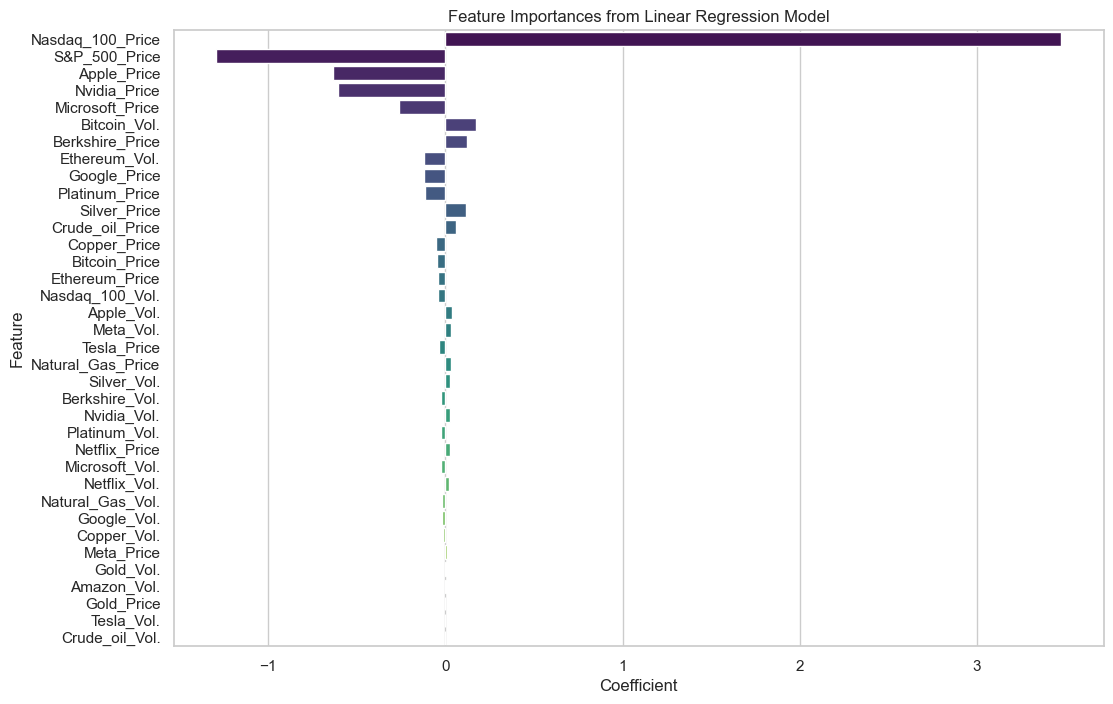

In [64]:
# Extracting feature names from the dataframe
feature_names = X_train.columns

# Getting the coefficients from the model
coefficients = model.coef_

# Creating a DataFrame for visualization
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sorting the DataFrame by absolute coefficient value for better visualization
coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Absolute_Coefficient', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Feature Importances from Linear Regression Model')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()